# Question 1
- Learn & Understand Zip's Law.

###### Pick file in NLTK Package 
###### Proof if Zip's Law work in NLTK package or not.

In [1]:
import glob
files = glob.glob("C://Users//rohit//AppData//Roaming//nltk_data/corpora/gutenberg/*.txt")
with open( 'D:\Python\Assignment 2\Question 1/data/gutenberg.txt', 'w' ) as result:
    for file in files:
        for line in open( file, 'r' ):
            result.write(line)

In [2]:
import re
file = open('D:\Python\Assignment 2\Question 1/data/gutenberg.txt', 'r')
l = []
contents = file.readlines()

for line in range(len(contents)):
    l.extend(re.findall(r"[\w']+", contents[line]))
    
def clean(elem):
    return  re.sub('[^a-zA-Z0-9 \n\.]', '', elem)

newList = []
for c in range(len(l)):
    removed = clean(l[c])
    newList.append(removed)

In [3]:
frequency={}
for word in newList:
    count = frequency.get(word,0)
    frequency[word] = count + 1
sortedDict = sorted(frequency.items(), key=lambda x: (-x[1], x[0])) # sorted is used to sort dictionary in descending order.

In [4]:
i = 1
rankList = []
for rank in range(len(sortedDict)):
    obj1 = sortedDict[rank]
    obj1 = obj1 + (i,)
    rankList.append(obj1)
    i = i+1


In [5]:
import csv
fileName = 'D:\Python\Assignment 2\Question 1/data/gutenbergCorpus.csv'
with open(fileName, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Word", "Frequency", "Rank"])
    a.writerows(rankList)

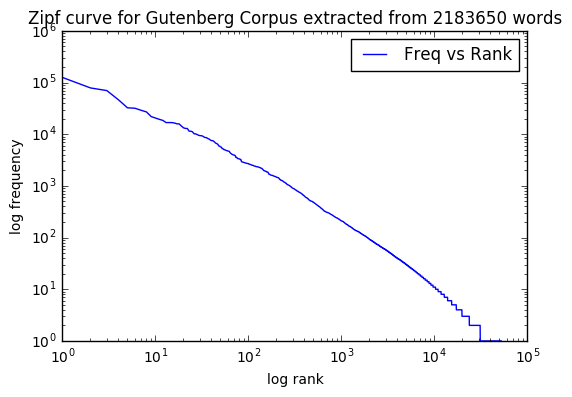

In [13]:
import matplotlib.pyplot as plt

x = []
y = []

with open(fileName,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[2]))
        y.append(int(row[1]))

plt.loglog(x,y, label='Freq vs Rank')
plt.xlabel('log rank')
plt.ylabel('log frequency')
plt.title('Zipf curve for Gutenberg Corpus extracted from 2183650 words')
plt.legend()
plt.show()